In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 1.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.3 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 6.6 MB/s eta 0:00:0000:0100:01
  Created wheel for shap: filename=shap-0.41.0-cp38-cp38-macosx_11_0_arm64.whl size=431130 sha256=5bb140feba83a84e58be83f1c41a0da6f6e5be400684b4206129628f40790830
  Stored in directory: /Users/hugoestradasmacstudio/Library/Caches/pip/wheels/ce/88/02/d61461a8257cafd92d65bc02c1ad45294632a71cfe0db5299d
Successfully built shap


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('advertising.csv')
data.columns = data.columns.map(lambda row: "_".join(row.lower().split(" ")))

In [7]:
data

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [9]:
from patsy import dmatrices

y, X = dmatrices(
    "clicked_on_ad ~ daily_time_spent_on_site + age + area_income + daily_internet_usage  + male -1",
    data=data,
)

X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
import xgboost

model = xgboost.XGBClassifier().fit(X_train, y_train)

predict = model.predict(X_test)

In [14]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)
f1

0.9619047619047619

In [15]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_frame)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


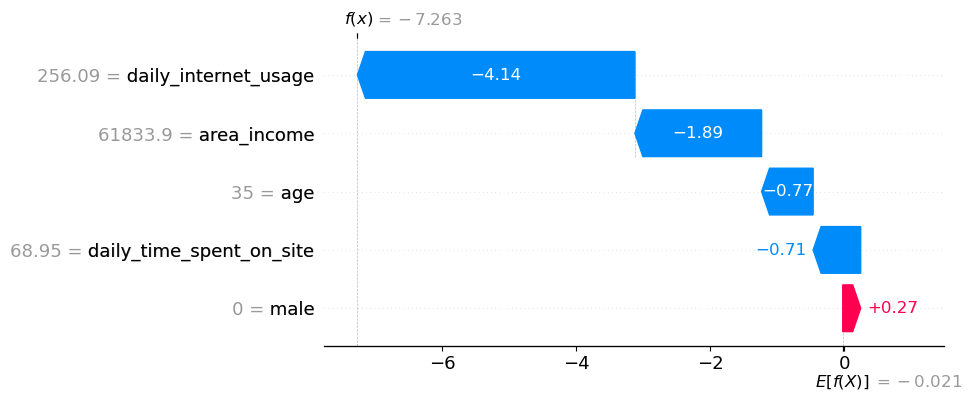

In [16]:
shap.plots.waterfall(shap_values[0])